Augusto Sousa Nunes

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [3]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,44.586875,0.405000,0.242500,0.193750,32.138750,59.142035
std,143.814421,0.491046,0.428729,0.395359,12.000813,29.653766
min,0.000000,0.000000,0.000000,0.000000,18.000000,4.673025
25%,9.000000,0.000000,0.000000,0.000000,21.000000,37.331341
50%,18.000000,0.000000,0.000000,0.000000,31.000000,54.643810
75%,38.000000,1.000000,0.000000,0.000000,40.000000,74.703597
max,3897.000000,1.000000,1.000000,1.000000,74.000000,201.994822


<Axes: xlabel='nsneeze'>

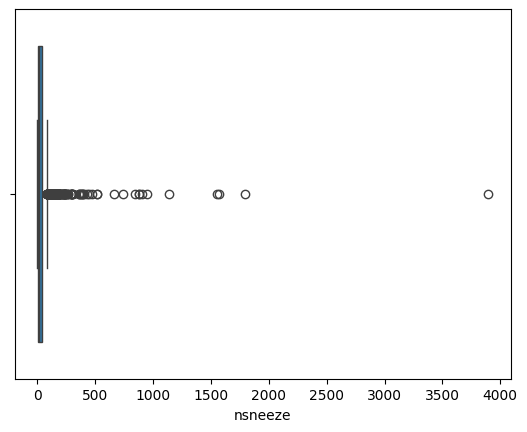

In [4]:
sns.boxplot(data=df, x="nsneeze")

A distribuição da váriavel nsneeze é extremamente assimétrica.

<Axes: xlabel='nsneeze', ylabel='Count'>

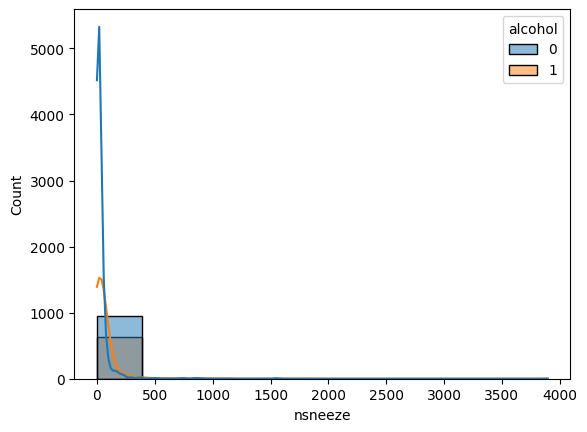

In [5]:
sns.histplot(df, x="nsneeze", hue='alcohol', bins=10, kde=True)

In [6]:
df.groupby('alcohol')['nsneeze'].mean()

,nsneeze
alcohol,
0,33.044118
1,61.544753


A média de espirros de pessoas que beberam nas últimas 24 hrs é maior que as que não beberam.

In [7]:
df.groupby('antihist')['nsneeze'].mean()

,nsneeze
antihist,
0,51.386964
1,23.345361


A média de espirros de pessoas que não tomaram anti-histamínicos é maior que a de pessoas que tomaram.

In [8]:
df.groupby('smoker')['nsneeze'].mean()

,nsneeze
smoker,
0,37.387597
1,74.545161


A média de espirros de pessoas fumantes é maior que de pessoas não fumantes.

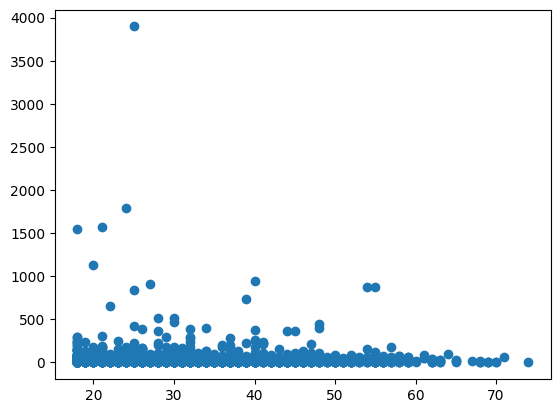

In [9]:
plt.scatter(df["age"], df["nsneeze"])

<Axes: xlabel='age', ylabel='nsneeze'>

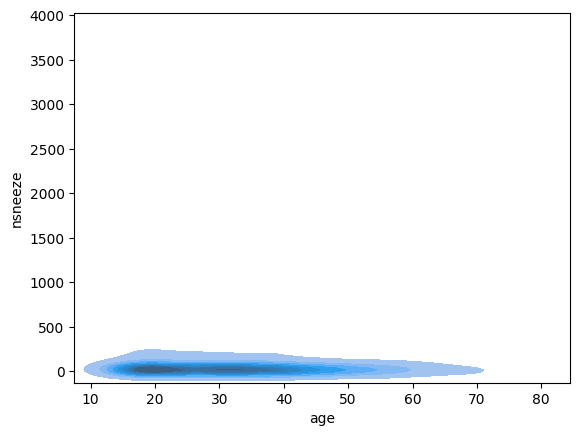

In [10]:
sns.kdeplot(data=df, y="nsneeze", x="age", fill=True )

A associação da variável idade e nsneeze não aparenta ser tão grande. Pode-s observar que há uma pequena diminuição dos espirros com a idade.

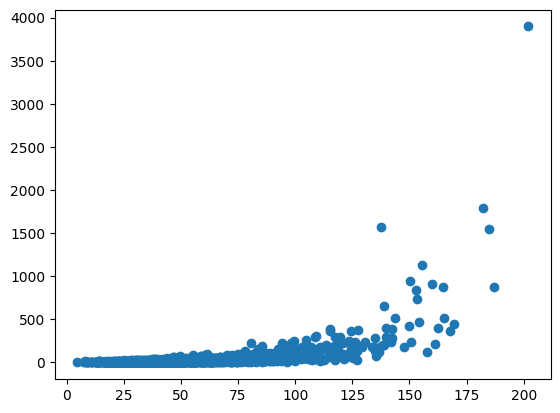

In [11]:
plt.scatter(df["pollen"], df["nsneeze"])

Quanto maior a concentração de pólen no ar maior a quantidade de espirros.

<Axes: >

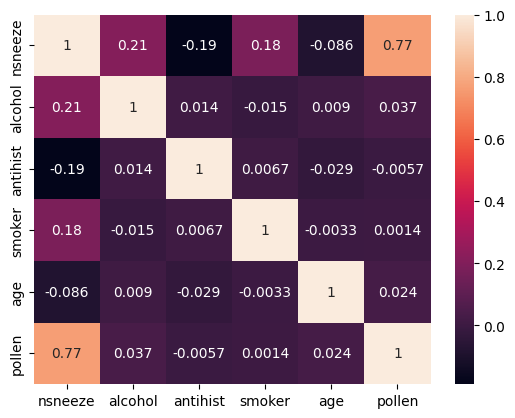

In [12]:
sns.heatmap(df.corr("spearman"), annot=True)

A variável com maior correlação é a pollen com nsneeze.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [13]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [15]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Wed, 03 Dec 2025   Deviance:                       15064.
Time:                        21:07:52   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

Todas as covariáveis deram significancia estatística com $\alpha = 0.05$. As variáveis alcohol, pollen e smoker tem coeficiente positivos, que significa que a concentração de polén, ser fumante e ter usado álcool aumentam a quantidade de espirros. Enquanto que ter usado anti-histamínico e ser mais velho diminuem a quantidade de espirros.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [16]:
dispersao_pearson_chi2 = sum(ajuste_pois.resid_pearson**2)/ajuste_pois.df_resid
dispersao_deviance = ajuste_pois.deviance / ajuste_pois.df_resid

print("Dispersão de Person chi2: ", dispersao_pearson_chi2)
print("Dispersão por comparação deviance/gl: ", dispersao_deviance)

Dispersão de Person chi2:  9.98491330831568
Dispersão por comparação deviance/gl:  9.450238520931574


Como ambos, coeficiente de dispersão de Pearson chi2/g.l e a razão do deviance por g.l, são bem maiores que 1, temos indicios de superdispersão. Ou seja, o modelo poisson não é adequado neste caso.

In [17]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

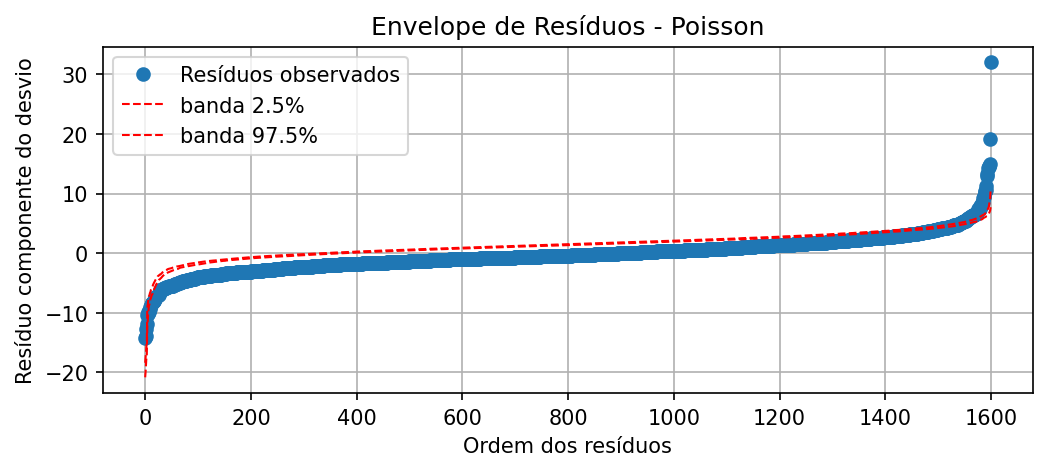

In [18]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)



In [20]:
print("Deviance:")
print("Poison: ", ajuste_pois.deviance)
print("BinonNeg: ", ajuste_nb.deviance)

Deviance:
Poison:  15063.680202364929
BinonNeg:  1785.6422286692


In [21]:
ajuste_pois.deviance/ajuste_nb.deviance

np.float64(8.436001322387833)

In [22]:
print("AIC:")
print("Poison: ", ajuste_pois.aic)
print("BinonNeg: ", ajuste_nb.aic)

AIC:
Poison:  22704.144883600697
BinonNeg:  12123.499132630262


O deviance do modelo com resposta Binomial negativa ficou aprox 8x menor que da poisson. Também, o AIC deu menor para o modelo com resp Binom negativa, que indica ser um modelo melhor.

In [23]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


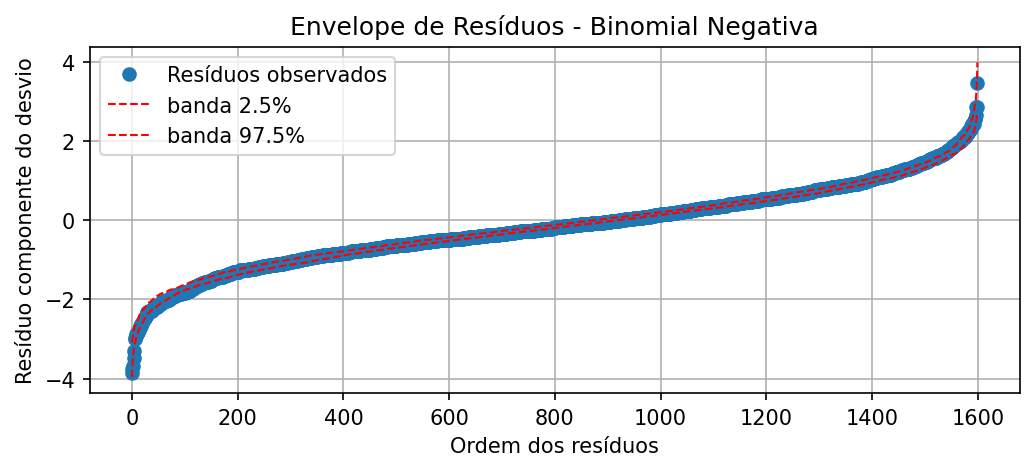

In [24]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

Ao contrário do gráfico dos resíduos componente do desvio do modelo Poison, os resíduos do modelo Binom neg. ficam entre as bandas de 95%. Isso indica uma qualidade maior de ajuste aos dados.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [25]:
marg_nb = ajuste_nb.get_margeff(at='overall')
print(marg_nb.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     18.6652      1.249     14.949      0.000      16.218      21.112
C(antihist)[T.1]   -23.0131      1.490    -15.448      0.000     -25.933     -20.093
C(smoker)[T.1]      22.1822      1.535     14.455      0.000      19.174      25.190
age                 -0.4666      0.049     -9.611      0.000      -0.562      -0.371
pollen               1.3291      0.046     28.849      0.000       1.239       1.419


Consumir álcool nas últimas 24 horas, segundo o modelo ajustado aos dados fornecidos, aumenta a média de espirros em aproximadamente 18 espirros. Já utilizar anti-histamínico reduz em 23 espirros.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
train, test = train_test_split(df, test_size=0.20, random_state=42)

In [28]:
train

,nsneeze,alcohol,antihist,smoker,age,pollen
1532,9,0,0,0,18.0,19.066337
628,9,1,0,0,30.0,40.373725
693,12,0,0,1,21.0,66.141823
705,9,0,0,0,43.0,47.663805
497,21,1,0,0,18.0,50.670870
...,...,...,...,...,...,...
1130,8,0,1,0,25.0,71.205448
1294,22,0,0,0,18.0,57.379319
860,66,0,0,1,57.0,68.746629
1459,17,0,0,0,32.0,57.575075


In [29]:
modelo_pois = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()

modelo_nb = smf.glm(
    formula=formula,
    data=train,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()


In [30]:
pred_pois = ajuste_pois.predict(test)
pred_nb = ajuste_nb.predict(test)


In [31]:
eqm_pois = mean_squared_error(test["nsneeze"], pred_pois)
eam_pois = mean_absolute_error(test["nsneeze"], pred_pois)

eqm_nb = mean_squared_error(test["nsneeze"], pred_nb)
eam_nb = mean_absolute_error(test["nsneeze"], pred_nb)

In [32]:
print("EQM")
print("Poisson: ", eqm_pois)
print("BinonNeg: ", eqm_nb)

EQM
Poisson:  1370.5487633691525
BinonNeg:  1942.3717708616437


In [33]:
print("EAM")
print("Poisson: ", eam_pois)
print("BinonNeg: ", eam_nb)

EAM
Poisson:  14.706140953867287
BinonNeg:  15.207827147384336


Segundo as métricas preditivas, o modelo poisson se saiu melhor. Isso vai contra a análise de ajuste que foi feita nos itens anteriores.

O modelo com melhor ajuste pode não necessariamente ser o melhor preditor fora da amostra, pois quando analisamos métricas de desempenho preditivo, estamos avaliando a capacidade de generalização do modelo nos dados.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [34]:
ind = pd.DataFrame({
    "alcohol": [0, 1],
    "antihist": [1, 0],
    "smoker": [0, 1],
    "age": [30, 50],
    "pollen": [30, 70]
})

In [36]:
results = ajuste_pois.predict(ind)

In [37]:
results.index = ["Indivíduo A", "Indivíduo B"]

In [39]:

results.columns = ["nsneeze"]

In [40]:
results

,0
Indivíduo A,4.225550
Indivíduo B,51.636128
